In [ ]:
!git clone https://github.com/9444148408msr/DataSet.git


fatal: destination path 'DataSet' already exists and is not an empty directory.


In [ ]:
cd DataSet


/content/DataSet


In [ ]:
import pandas as pd
data=pd.read_csv("/content/DataSet/demo1.csv")
data=pd.concat([data,pd.read_csv("/content/DataSet/demo0.csv")])
data=pd.concat([data,pd.read_csv("/content/DataSet/demo2.csv")])
data=pd.concat([data,pd.read_csv("/content/DataSet/demo3.csv")])
data=pd.concat([data,pd.read_csv("/content/DataSet/demo4.csv")])
data=pd.concat([data,pd.read_csv("/content/DataSet/demo5.csv")])
data=pd.concat([data,pd.read_csv("/content/DataSet/demo6.csv")])
test=pd.read_csv("/content/DataSet/demo7.csv")


In [ ]:
data=data.drop("CPU_cores_percent_used.1",1)
data=data.drop("cache_miss.1",1)
data=data.drop("instructions.1",1)
data=data.drop("cycles.1",1)
data=data.drop("CPU_core_demand.1",1)
data=data.drop("RAM_demand.1",1)
data=data.drop("swap.1",1)
data=data.drop("cpi.1",1)
data=data.drop("cpi",1)
data=data.drop("cache_miss",1)
time=data["time.1"]
data=data.drop("time.1",1)
print(data.head())
test=test.drop("CPU_cores_percent_used.1",1)
test=test.drop("cache_miss.1",1)
test=test.drop("instructions.1",1)
test=test.drop("cycles.1",1)
test=test.drop("CPU_core_demand.1",1)
test=test.drop("RAM_demand.1",1)
test=test.drop("swap.1",1)
test=test.drop("cpi.1",1)
test=test.drop("cpi",1)
time_test=test["time.1"]
test=test.drop("time.1",1)
test=test.drop("cache_miss",1)
print(test.head())

   CPU_freq  CPU_cores_percent  memory  CPU_cores_percent_used  instructions  \
0       900                0.2      20                   0.199   49389351174   
1       900                0.2      20                   0.199   49389351174   
2       900                0.2      20                   0.199   49389351174   
3       900                0.2      20                   0.199   49389351174   
4       900                0.2      20                   0.199   49389351174   

        cycles       time  temperature  CPU_core_demand  RAM_demand  swap  \
0  14412091220  80.654687         48.0              1.1          25  4620   
1  14412091220  80.654687         48.0              1.1          25  4620   
2  14412091220  80.654687         48.0              1.1          25  4620   
3  14412091220  80.654687         48.0              1.1          25  4620   
4  14412091220  80.654687         48.0              1.1          25  4620   

   CPU_freq.1  CPU_cores_percent.1  memory.1  temperatur

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dropout
from keras.layers import Activation, Dense

Using TensorFlow backend.


In [ ]:
from keras.layers import LeakyReLU,PReLU
from keras import metrics
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))
def baseline_model():
    model = Sequential()
    model.add(Dense(15, input_dim=15, kernel_initializer='normal'))
    model.add(Activation('tanh'))
    model.add(Dense(8, kernel_initializer='normal'))
    model.add(Activation('tanh'))
    model.add(Dense(4, kernel_initializer='normal'))
    model.add(Activation('tanh'))
    model.add(Dense(2, kernel_initializer='normal'))
    model.add(Activation('softmax'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='Rmsprop',metrics=['mae','mse',r_square])
    return model

In [ ]:
print(len(test))
print(len(time_test))
import numpy as np
#from sklearn.decomposition import PCA
x_data=np.array(data)
test_x=np.array(test)
#pca=PCA(n_components=16)
#pca.fit(x_data)

153664
153664


In [ ]:
#x_data=pca.transform(x_data)
#test_x=pca.transform(test_x)
from sklearn.preprocessing import normalize
x_data=normalize(x_data,norm="l1")
#test_x=normalize(test_x,norm="l1")
from sklearn import preprocessing
x_data=preprocessing.scale(x_data)
test_x=preprocessing.scale(test_x)
#print(len(test_x))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(np.array(x_data), np.array(time), test_size=0.3, random_state=42)
test_x=np.array(test_x)
time_test=np.array(time_test)

In [ ]:
model=baseline_model()
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=500, batch_size=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 752953 samples, validate on 322695 samples
Epoch 1/500
752953/752953 [==============================] - 4s 5us/step - loss: 571.5445 - mean_absolute_error: 14.1408 - mean_squared_error: 571.5445 - r_square: -0.5481 - val_loss: 561.0736 - val_mean_absolute_error: 13.4655 - val_mean_squared_error: 561.0736 - val_r_square: -0.4830
Epoch 2/500
752953/752953 [==============================] - 3s 4us/step - loss: 531.1964 - mean_absolute_error: 12.7316 - mean_squared_error: 531.1964 - r_square: -0.4375 - val_loss: 522.9173 - val_mean_absolute_error: 12.1927 - val_mean_squared_error: 522.9173 - val_r_square: -0.3809
Epoch 3/500
752953/752953 [==============================] - 3s 4us/step - loss: 495.5055 - mean_absolute_error: 11.6241 - mean_squared_error: 495.5055 - r_square: -0.3392 - val_loss: 489.2824 - val_mean_absolute_error: 11.2405 - val_mean_squared_error: 

In [ ]:
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
plot_model(model, to_file='model.png',show_shapes=True, show_layer_names=True)
model.predict(X_train[0:10])
score = model.evaluate(X_test, y_test, batch_size=32)
print("accruacy",score)
print("mean square error",mean_squared_error(model.predict(X_test),y_test))
print("mean absolute error",mean_absolute_error(model.predict(X_test),y_test))
score = model.evaluate(test_x, time_test, batch_size=32)
print("accruacy",score)
print("mean square error",mean_squared_error(model.predict(test_x),time_test))
print("mean absolute error",mean_absolute_error(model.predict(test_x),time_test))
print(model.predict(test_x)[0:100])
print(time_test[0:100])

322695/322695 [==============================] - 11s 34us/step
accruacy [2.0111183976842253, 0.8101098051924743, 2.0111183976842253, 0.9914688392198903]
mean square error 2.0111183020607246
mean absolute error 0.8101097994444088
153664/153664 [==============================] - 5s 34us/step
accruacy [1497.1492019472198, 23.603957814655917, 1497.1492019472198, -19.578202256829677]
mean square error 1497.1491851198882
mean absolute error 23.60395770768082
[[191.44669  ]
 [191.44664  ]
 [191.44664  ]
 [191.44662  ]
 [191.44641  ]
 [191.44586  ]
 [191.44482  ]
 [191.44847  ]
 [191.44856  ]
 [191.44862  ]
 [191.44868  ]
 [191.44868  ]
 [191.44867  ]
 [191.44856  ]
 [191.44923  ]
 [191.44925  ]
 [191.44928  ]
 [191.44928  ]
 [191.4493   ]
 [191.4493   ]
 [191.4493   ]
 [191.44089  ]
 [191.4424   ]
 [191.4433   ]
 [191.44307  ]
 [191.43918  ]
 [191.41539  ]
 [191.33418  ]
 [191.37254  ]
 [191.37473  ]
 [191.39043  ]
 [191.39932  ]
 [191.40366  ]
 [191.40298  ]
 [191.39865  ]
 [ 68.366806 ]
 [ 

In [ ]:
list(pd.read_csv("/content/DataSet/demo1.csv"))

['CPU_freq',
 'CPU_cores_percent',
 'memory',
 'CPU_cores_percent_used',
 'cache_miss',
 'instructions',
 'cycles',
 'time',
 'temperature',
 'CPU_core_demand',
 'RAM_demand',
 'cpi',
 'swap',
 'CPU_freq.1',
 'CPU_cores_percent.1',
 'memory.1',
 'CPU_cores_percent_used.1',
 'cache_miss.1',
 'instructions.1',
 'cycles.1',
 'time.1',
 'temperature.1',
 'CPU_core_demand.1',
 'RAM_demand.1',
 'cpi.1',
 'swap.1']

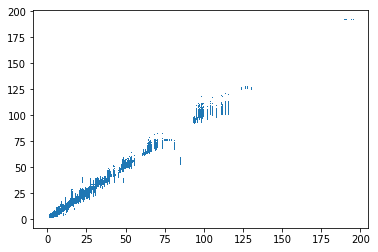

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_train,model.predict(X_train),",")


In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
clf=linear_model.LinearRegression()

In [ ]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
print("accruacy",clf.score(X_test,y_test))
print("mean square error",mean_squared_error(clf.predict(X_test),y_test))
print("mean absolute error",mean_absolute_error(clf.predict(X_test),y_test))
print("validation accruacy",clf.score(test_x,time_test))
print("validation mean square error",mean_squared_error(clf.predict(test_x),time_test))
print("validation mean absolute error",mean_absolute_error(clf.predict(test_x),time_test))

accruacy 0.25911073532674034
mean square error 281.62285954337494
mean absolute error 9.67902864266113
validation accruacy -1.7361744811153104e+25
validation mean square error 1.8093703465969577e+28
validation mean absolute error 95581654165630.25


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
clf=GradientBoostingRegressor()
clf.fit(X_train,y_train)
print("accruacy",clf.score(X_test,y_test))
print("mean square error",mean_squared_error(clf.predict(X_test),y_test))
print("mean absolute error",mean_absolute_error(clf.predict(X_test),y_test))
print("validation accruacy",clf.score(test_x,time_test))
print("validation mean square error",mean_squared_error(clf.predict(test_x),time_test))
print("validation mean absolute error",mean_absolute_error(clf.predict(test_x),time_test))

accruacy 0.9902396718448255
mean square error 3.71004366806984
mean absolute error 1.1322010253107404
validation accruacy 0.5594950462401822
validation mean square error 459.07632529540786
validation mean absolute error 13.155300400479412


In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor()

clf.fit(X_train,y_train)
print("accruacy",clf.score(X_test,y_test))
print("mean square error",mean_squared_error(clf.predict(X_test),y_test))
print("mean absolute error",mean_absolute_error(clf.predict(X_test),y_test))
print("validation accruacy",clf.score(test_x,time_test))
print("validation mean square error",mean_squared_error(clf.predict(test_x),time_test))
print("validation mean absolute error",mean_absolute_error(clf.predict(test_x),time_test))


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accruacy 0.9982443617638054
mean square error 0.6673438042308023
mean absolute error 0.2721139720871552
validation accruacy 0.573895279003501
validation mean square error 444.0689890919032
validation mean absolute error 14.223665352280745


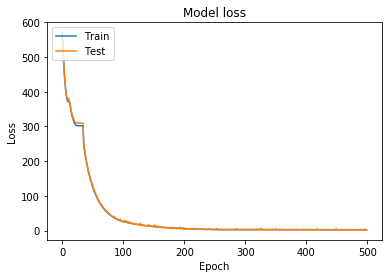

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'val_r_square', 'loss', 'mean_absolute_error', 'mean_squared_error', 'r_square'])


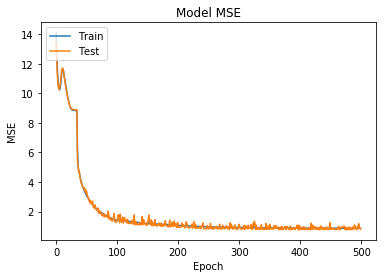

In [ ]:
print(history.history.keys())
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'val_r_square', 'loss', 'mean_absolute_error', 'mean_squared_error', 'r_square'])


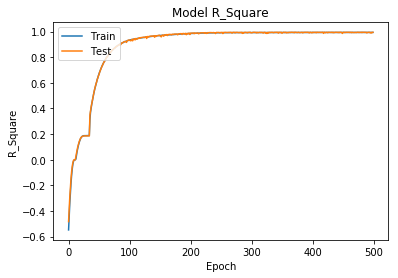

In [ ]:
print(history.history.keys())
plt.plot(history.history['r_square'])
plt.plot(history.history['val_r_square'])
plt.title('Model R_Square')
plt.ylabel('R_Square')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()